# SYDE 552 Assignment 4: Basal Ganglia
### Due Monday, April 8, 11:59pm
### Value: 15% of total marks for the course

This assignment covers various forms of Action Selection, covering a standard feed-forward neural network model and a winner-take-all model.  The last section adds biological details to the winner-take-all model (synapses).  The intent is to show the creation a modification of small specific-purpose networks and to explore how timing affects neurons.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. Action Selection with Feed-forward Neural Networks

In order for the brain to choose which of many possible actions to select to perform at any given moment, it needs to be able to takke a list of numbers (indicating how good each action is in the current state, sometimes called the Value) and create an output that indicates which one is the largest.  For example, with the input `[0.2, 0.5, 0.8, 0.3]` we might want the output `[0, 0, 1, 0]`.  

One way to approach this task is to train a normal feed-forward neural network on this task.  This would be similar to the digit recognition task from Assignment 2, except we would just have the list of values as input instead of the image.

To create the dataset for training the network, we can just generate a random set of values between 0 and 1, and then compute which one is biggest to produce our target value.

In [39]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

In order to train with this data in pytorch, we need to turn that array into a pytorch dataset, and to split it into training and testing.


In [40]:
import torch
dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


Now we have to define our network.  Here we define a simple neural network with 4 inputs, a hidden layer of 100 neurons, and 4 outputs.

In [41]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
    
network = Net()

Finally, we have to train the model.  Here is the exact same code from Assignemnt 2 for training


In [26]:
# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


**1. a) [1 mark]** Call `continue_training()` 10 times and then plot the training and testing accuracy (as you did in assignment 2 question 3a.

Iteration 11 Training accuracy: 0.257750004529953
Iteration 11 Testing accuracy: 0.2395000010728836
Iteration 12 Training accuracy: 0.257750004529953
Iteration 12 Testing accuracy: 0.2395000010728836
Iteration 13 Training accuracy: 0.257750004529953
Iteration 13 Testing accuracy: 0.2395000010728836
Iteration 14 Training accuracy: 0.257750004529953
Iteration 14 Testing accuracy: 0.2395000010728836
Iteration 15 Training accuracy: 0.257750004529953
Iteration 15 Testing accuracy: 0.2395000010728836
Iteration 16 Training accuracy: 0.257750004529953
Iteration 16 Testing accuracy: 0.2395000010728836
Iteration 17 Training accuracy: 0.257750004529953
Iteration 17 Testing accuracy: 0.2395000010728836
Iteration 18 Training accuracy: 0.257750004529953
Iteration 18 Testing accuracy: 0.2395000010728836
Iteration 19 Training accuracy: 0.257750004529953
Iteration 19 Testing accuracy: 0.2395000010728836
Iteration 20 Training accuracy: 0.257750004529953
Iteration 20 Testing accuracy: 0.2395000010728836


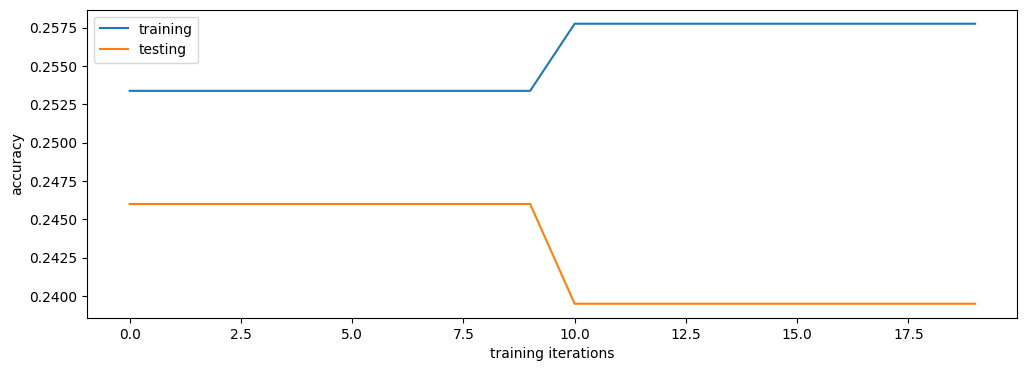

In [42]:
import matplotlib.pyplot as plt

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

**1. b) [1 mark]** In the previous question, the model did not get a very high accuracy.  To try to improve the accuracy, let's vary the number of neurons.  Try using 200 neurons, 500 neurons, and 1000 neurons.  For each one, generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.25099998712539673
Iteration 1 Testing accuracy: 0.23849999904632568
Iteration 2 Training accuracy: 0.25600001215934753
Iteration 2 Testing accuracy: 0.23849999904632568
Iteration 3 Training accuracy: 0.25600001215934753
Iteration 3 Testing accuracy: 0.23849999904632568
Iteration 4 Training accuracy: 0.25600001215934753
Iteration 4 Testing accuracy: 0.23849999904632568
Iteration 5 Training accuracy: 0.24449999630451202
Iteration 5 Testing accuracy: 0.25200000405311584
Iteration 6 Training accuracy: 0.24449999630451202
Iteration 6 Testing accuracy: 0.25200000405311584
Iteration 7 Training accuracy: 0.24449999630451202
Iteration 7 Testing accuracy: 0.25200000405311584
Iteration 8 Training accuracy: 0.24449999630451202
Iteration 8 Testing accuracy: 0.25200000405311584
Iteration 9 Training accuracy: 0.24449999630451202
Iteration 9 Testing accuracy: 0.25200000405311584
Iteration 10 Training accuracy: 0.24449999630451202
Iteration 10 Testing accuracy: 0.252000

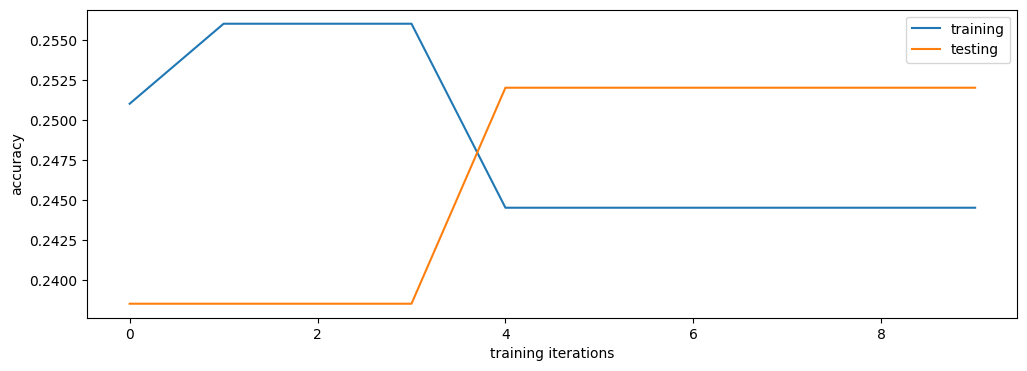

Iteration 1 Training accuracy: 0.25600001215934753
Iteration 1 Testing accuracy: 0.23849999904632568
Iteration 2 Training accuracy: 0.25600001215934753
Iteration 2 Testing accuracy: 0.23849999904632568
Iteration 3 Training accuracy: 0.25600001215934753
Iteration 3 Testing accuracy: 0.23849999904632568
Iteration 4 Training accuracy: 0.25600001215934753
Iteration 4 Testing accuracy: 0.23849999904632568
Iteration 5 Training accuracy: 0.24449999630451202
Iteration 5 Testing accuracy: 0.25200000405311584
Iteration 6 Training accuracy: 0.24449999630451202
Iteration 6 Testing accuracy: 0.25200000405311584
Iteration 7 Training accuracy: 0.24449999630451202
Iteration 7 Testing accuracy: 0.25200000405311584
Iteration 8 Training accuracy: 0.24449999630451202
Iteration 8 Testing accuracy: 0.25200000405311584
Iteration 9 Training accuracy: 0.24449999630451202
Iteration 9 Testing accuracy: 0.25200000405311584
Iteration 10 Training accuracy: 0.24449999630451202
Iteration 10 Testing accuracy: 0.252000

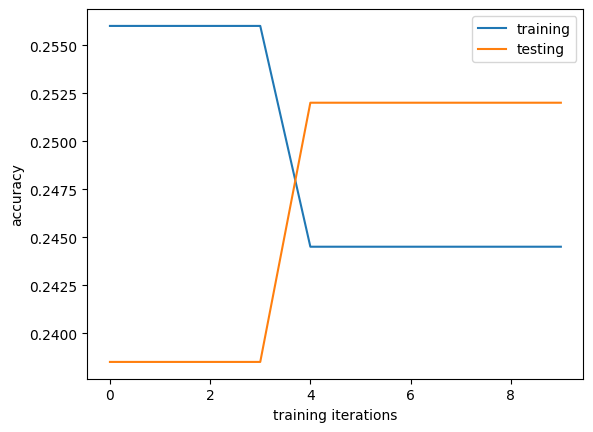

Iteration 1 Training accuracy: 0.25600001215934753
Iteration 1 Testing accuracy: 0.23849999904632568
Iteration 2 Training accuracy: 0.25600001215934753
Iteration 2 Testing accuracy: 0.23849999904632568
Iteration 3 Training accuracy: 0.25600001215934753
Iteration 3 Testing accuracy: 0.23849999904632568
Iteration 4 Training accuracy: 0.25600001215934753
Iteration 4 Testing accuracy: 0.23849999904632568
Iteration 5 Training accuracy: 0.24449999630451202
Iteration 5 Testing accuracy: 0.25200000405311584
Iteration 6 Training accuracy: 0.24449999630451202
Iteration 6 Testing accuracy: 0.25200000405311584
Iteration 7 Training accuracy: 0.24449999630451202
Iteration 7 Testing accuracy: 0.25200000405311584
Iteration 8 Training accuracy: 0.24449999630451202
Iteration 8 Testing accuracy: 0.25200000405311584
Iteration 9 Training accuracy: 0.24449999630451202
Iteration 9 Testing accuracy: 0.25200000405311584
Iteration 10 Training accuracy: 0.24449999630451202
Iteration 10 Testing accuracy: 0.252000

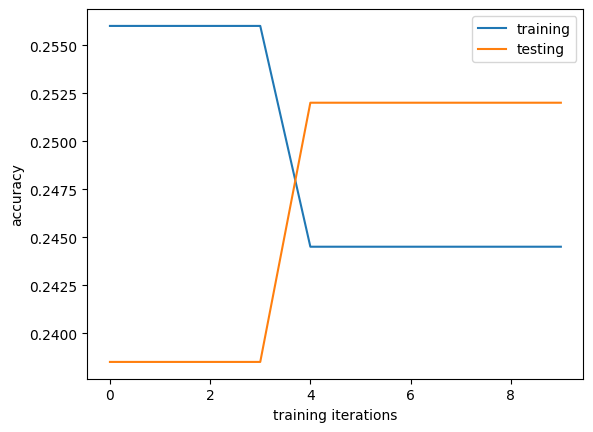

In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self, neuron):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, neuron)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(neuron, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
    

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

num_neurons = [200, 500, 1000]

plt.figure(figsize=(12,4))

for neuron in num_neurons:

    network = Net(neuron)

    # create the learning rule
    optimizer = torch.optim.SGD(network.parameters(), 
                                lr=0.1,   # learning rate
                                momentum=0.5)
    # variables to keep track of the training and testing accuracy
    accuracy_train = []
    accuracy_test = []
    for i in range(10):
        continue_training()
    plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
    plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
    plt.legend()
    plt.xlabel('training iterations')
    plt.ylabel('accuracy')
    plt.show()



**1. c) [1 mark]** Try making the network deeper by adding a second layer of neurons.  Use 500 neurons in each of the two middle layers.  Generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.25587499141693115
Iteration 1 Testing accuracy: 0.24950000643730164
Iteration 2 Training accuracy: 0.25587499141693115
Iteration 2 Testing accuracy: 0.24950000643730164
Iteration 3 Training accuracy: 0.25587499141693115
Iteration 3 Testing accuracy: 0.24950000643730164
Iteration 4 Training accuracy: 0.25587499141693115
Iteration 4 Testing accuracy: 0.24950000643730164
Iteration 5 Training accuracy: 0.2502500116825104
Iteration 5 Testing accuracy: 0.2485000044107437
Iteration 6 Training accuracy: 0.2502500116825104
Iteration 6 Testing accuracy: 0.2485000044107437
Iteration 7 Training accuracy: 0.2502500116825104
Iteration 7 Testing accuracy: 0.2485000044107437
Iteration 8 Training accuracy: 0.2502500116825104
Iteration 8 Testing accuracy: 0.2485000044107437
Iteration 9 Training accuracy: 0.2502500116825104
Iteration 9 Testing accuracy: 0.2485000044107437
Iteration 10 Training accuracy: 0.2502500116825104
Iteration 10 Testing accuracy: 0.2485000044107437


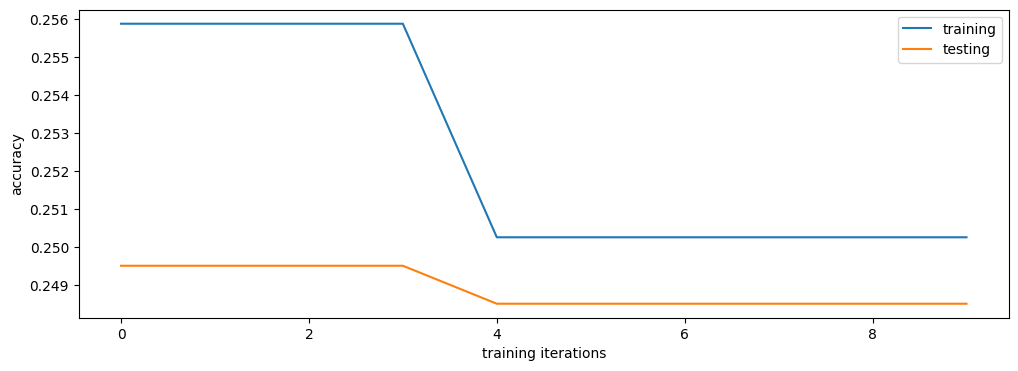

In [36]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 500)    # the weights from the input to the new learned features (hidden layer)
        self.fc3 = nn.Linear(4, 500)    # the weights from the input to the new learned features (hidden layer)

        self.fc2 = nn.Linear(500, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
    

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


network = Net()

# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)
# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()



**1. d) [1 mark]** Starting with the original model in question 1a, let's modify the network in a different way.  In particular, in the current version of the model we have no neuron model at the output.  This is due to this part of the code:

```python
    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
```

For the first line (the hidden layer), we use a Rectified Linear neuron model (`F.relu`).  But we aren't doing that with the second line, where it creates the output.  Let's try adding a neuron model there by changing `x = self.fc2(x)` to `x = F.relu(self.fc2(x))`.

Train the model again (by calling `continue_training` 10 times) and make the same plot as above.  Does this improve performance significantly?

Iteration 1 Training accuracy: 0.25987499952316284
Iteration 1 Testing accuracy: 0.2565000057220459
Iteration 2 Training accuracy: 0.25987499952316284
Iteration 2 Testing accuracy: 0.2565000057220459
Iteration 3 Training accuracy: 0.25987499952316284
Iteration 3 Testing accuracy: 0.2565000057220459
Iteration 4 Training accuracy: 0.25987499952316284
Iteration 4 Testing accuracy: 0.2565000057220459
Iteration 5 Training accuracy: 0.25987499952316284
Iteration 5 Testing accuracy: 0.2565000057220459
Iteration 6 Training accuracy: 0.25987499952316284
Iteration 6 Testing accuracy: 0.2565000057220459
Iteration 7 Training accuracy: 0.25987499952316284
Iteration 7 Testing accuracy: 0.2565000057220459
Iteration 8 Training accuracy: 0.25987499952316284
Iteration 8 Testing accuracy: 0.2565000057220459
Iteration 9 Training accuracy: 0.25987499952316284
Iteration 9 Testing accuracy: 0.2565000057220459
Iteration 10 Training accuracy: 0.25987499952316284
Iteration 10 Testing accuracy: 0.256500005722045

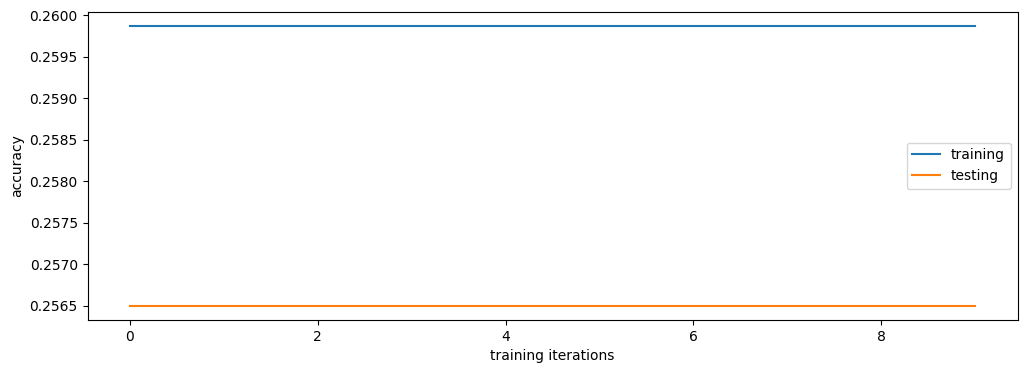

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.relu(self.fc2(x))                 # apply the second set of weights
        return x
    

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


network = Net()

# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)
# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()



**1. e) [1 mark]** Repeat 1.d but use `F.sigmoid` instead of `F.relu` for the output.  Plot the same graph as before.  You should see that this change makes an improvement over the results in the previous questions.  Why is this the case?

Iteration 1 Training accuracy: 0.19550000131130219
Iteration 1 Testing accuracy: 0.19349999725818634
Iteration 2 Training accuracy: 0.20225000381469727
Iteration 2 Testing accuracy: 0.19949999451637268
Iteration 3 Training accuracy: 0.20512500405311584
Iteration 3 Testing accuracy: 0.20200000703334808
Iteration 4 Training accuracy: 0.20675000548362732
Iteration 4 Testing accuracy: 0.20399999618530273
Iteration 5 Training accuracy: 0.20937499403953552
Iteration 5 Testing accuracy: 0.20749999582767487
Iteration 6 Training accuracy: 0.21074999868869781
Iteration 6 Testing accuracy: 0.2084999978542328
Iteration 7 Training accuracy: 0.210999995470047
Iteration 7 Testing accuracy: 0.2084999978542328
Iteration 8 Training accuracy: 0.21199999749660492
Iteration 8 Testing accuracy: 0.20999999344348907
Iteration 9 Training accuracy: 0.21299999952316284
Iteration 9 Testing accuracy: 0.210999995470047
Iteration 10 Training accuracy: 0.21412500739097595
Iteration 10 Testing accuracy: 0.212500005960

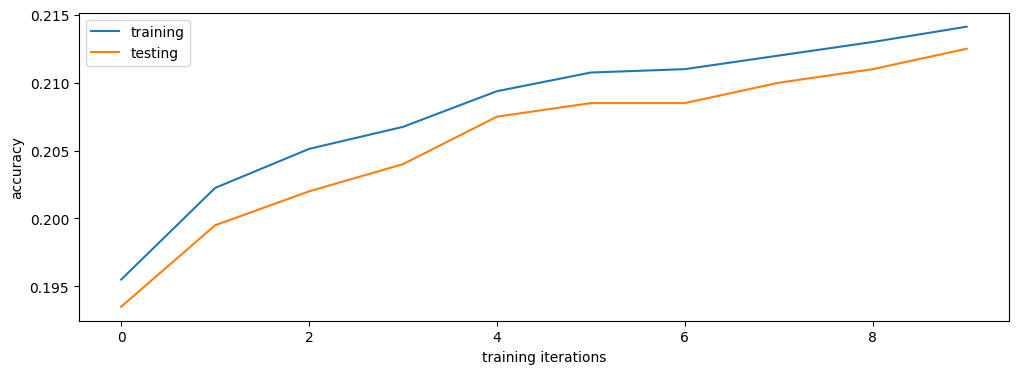

In [45]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.sigmoid(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.sigmoid(self.fc2(x))                 # apply the second set of weights
        return x
    

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


network = Net()

# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)
# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()



**1. f) [1 mark]** Try replacing the `F.sigmoid` with `F.softmax`.  The softmax function will scale up the largest value while scaling down the smaller values.  Repeat the previous question and plot the same graph.  You should see an even bigger improvement.  Why is this the case?  

C:\Users\Abby\AppData\Local\Temp\ipykernel_8632\3868733760.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
C:\Users\Abby\AppData\Local\Temp\ipykernel_8632\3868733760.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))                 # apply the second set of weights


Iteration 1 Training accuracy: 0.24637499451637268
Iteration 1 Testing accuracy: 0.25850000977516174
Iteration 2 Training accuracy: 0.24412499368190765
Iteration 2 Testing accuracy: 0.23849999904632568
Iteration 3 Training accuracy: 0.2548750042915344
Iteration 3 Testing accuracy: 0.24799999594688416
Iteration 4 Training accuracy: 0.2548750042915344
Iteration 4 Testing accuracy: 0.24799999594688416
Iteration 5 Training accuracy: 0.2548750042915344
Iteration 5 Testing accuracy: 0.24799999594688416
Iteration 6 Training accuracy: 0.2548750042915344
Iteration 6 Testing accuracy: 0.24799999594688416
Iteration 7 Training accuracy: 0.2548750042915344
Iteration 7 Testing accuracy: 0.24799999594688416
Iteration 8 Training accuracy: 0.2548750042915344
Iteration 8 Testing accuracy: 0.24799999594688416
Iteration 9 Training accuracy: 0.2548750042915344
Iteration 9 Testing accuracy: 0.24799999594688416
Iteration 10 Training accuracy: 0.2548750042915344
Iteration 10 Testing accuracy: 0.24799999594688

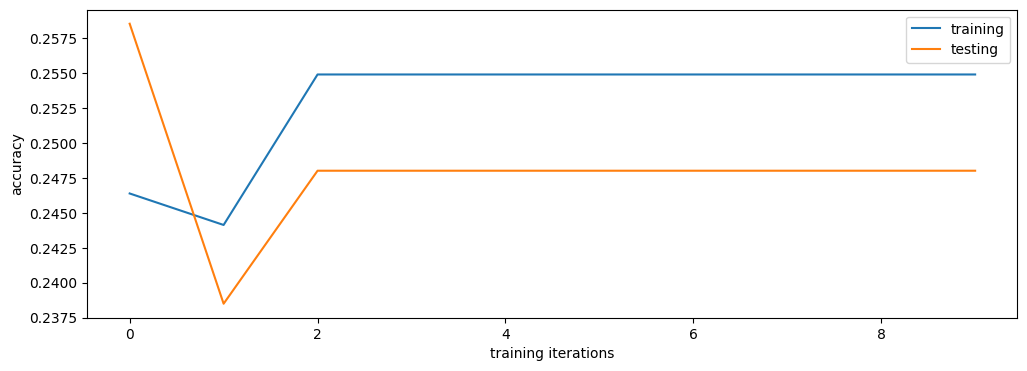

In [48]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.softmax(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.softmax(self.fc2(x))                 # apply the second set of weights
        return x
    

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


network = Net()

# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)
# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(range(len(accuracy_train)), accuracy_train, label='training')
plt.plot(range(len(accuracy_test)), accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()



**1. g) [1 mark]** Even though the model you built in 1f) does a good job of solving the task of producing the correct output, it seems to do this only if we include a `softmax` operation.  How might this be considered "cheating" (and thus this should not considered to be a good model of action selection in the brain)? 

# 2. Action Selection with Winner-Take-All

Given the results of the previous section, we need a different approach to do action selection.  Since a feed-forward approach led to difficulties, here we will explore a recurrent network: the standard "winner-take-all" circuit.  In this system, each neuron excites itself but inhibits the other neurons.

Crucially, since this approach is recurrent, we can't just feed in an input and get an output.  Instead, we will feed in an input over time and see what the output is over time.  Rather than implement this in `pytorch`, we will just use normal numpy commands.

The main configurable part of the model is how nuch the neurons excite themselves and how much they inhibit other neurons.  We can build this as a weight matrix that has the excitation on the diagonal and the inhibition everywhere else:


In [70]:
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection
    
print(w)

[[ 1.  -0.9 -0.9 -0.9]
 [-0.9  1.  -0.9 -0.9]
 [-0.9 -0.9  1.  -0.9]
 [-0.9 -0.9 -0.9  1. ]]


To run the model, we pick a particular input that set that we will provide.  We then feed that value into the model, and add the value that the neurons send back to themselves.  We also include a `clip` operation that stops the neuron value from going below 0 or above 1.  We repeat this process multiple times, and we record the activity of the neurons so we can plot it afterwards.

In [63]:
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
def model(input_values, record, activity, w):
    for i in range(10):
        # the new neuron value is the old value times the weight matrix (for the neurons 
        #  inhibiting and exciting each other), plus the input benig added.
        # we also clip the neurons so their activity doesn't go below 0 or above 1
        activity = np.clip(input_values + w @ activity, 0, 1)
        record.append(activity)

**2. a) [1 mark]**  Run the model with an input of `[0.7, 0.8, 0.4, 0.3]`.  Plot the `record` of the activity.  Print the final `activity` value.  Does the network successfully output the desired correct results of `[0, 1, 0, 0]`?

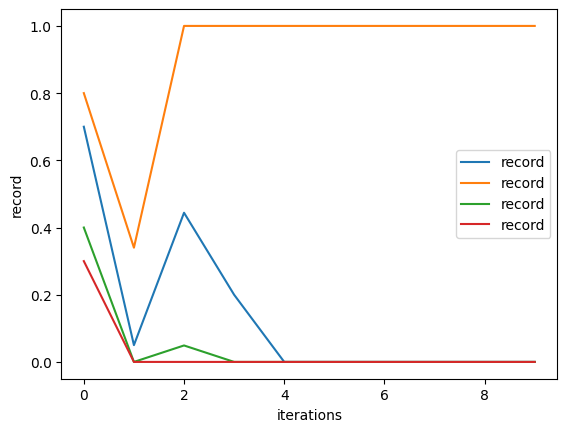

[0. 0. 0. 0.]


In [64]:
input = [0.7, 0.8, 0.4, 0.3]

model(input, record, activity, w)
plt.figure()
plt.plot(record, label='record')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('record')
plt.show()
print(activity)

**2. b) [1 mark]**  Test the model using all the data in the `X` dataset you created in question 1.  (This should be all 10000 sets of 4 randomly generated numbers).  Note that since we didn't use any data to train the model, we are using all of it to test the model.

To test the model, loop through all the items (`for input_values in X:`) and run the model as in question 2a.  To determine if the output is correct, you can do

```python
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
        correct += 1
```

What proportion of the time does the model produce the correct output?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


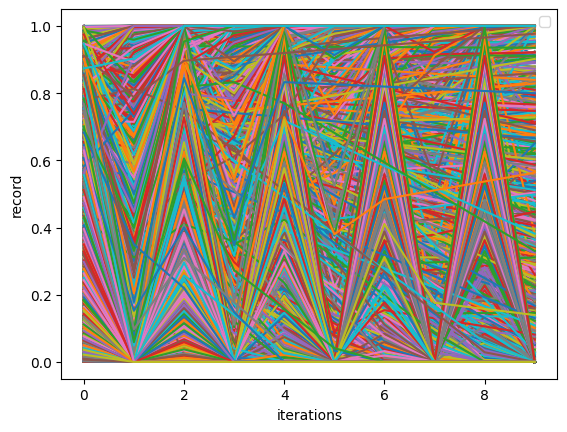

[0. 0. 0. 0.]
0.0


In [75]:
correct = 0
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
target = np.zeros(N)

plt.figure()

for input_values in X:
    record = []                   # for recording the activity values
    activity = np.zeros(N)        # neurons are not active initially

    model(input_values, record, activity, w)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
        correct += 1
    plt.plot(record)


plt.legend()
plt.xlabel('iterations')
plt.ylabel('record')
plt.show()
print(activity)
print(correct/len(X))

**2. c) [1 mark]**  Try running the model for a longer time, rather than the 10 steps in the code provided.  Try 10, 20, 50, 100, 200, and 500.  Make a plot showing the proportion of time the model produces the ideal output for each of those numbers of timesteps.

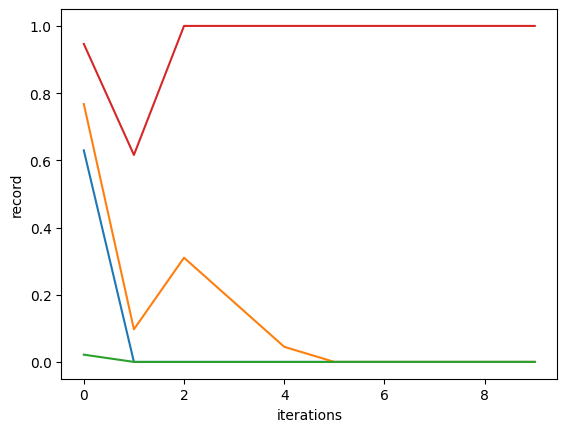

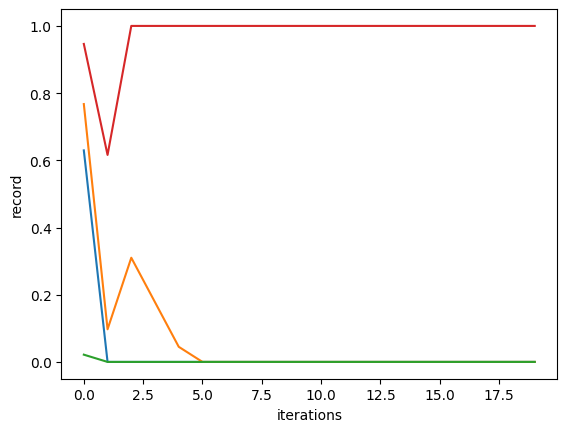

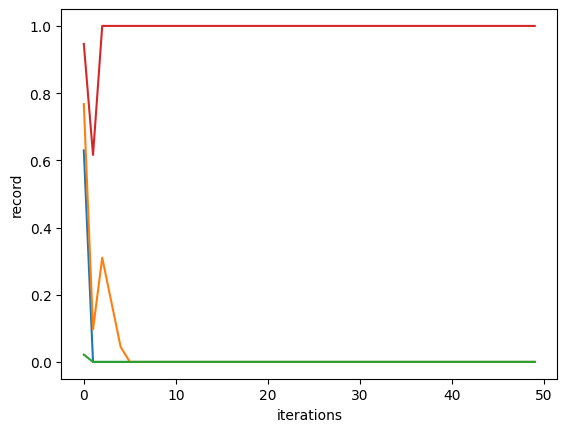

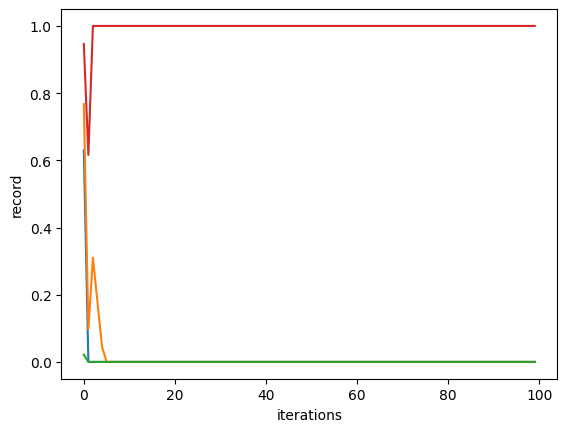

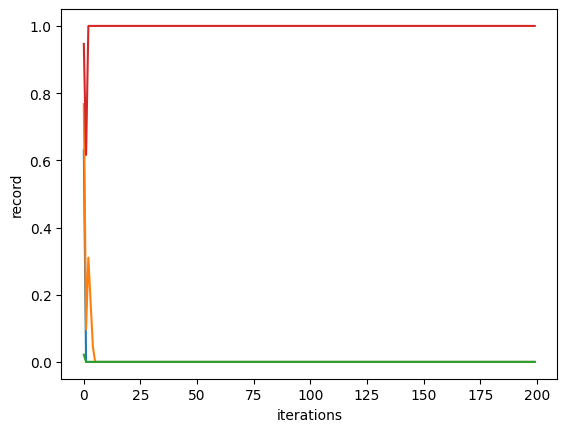

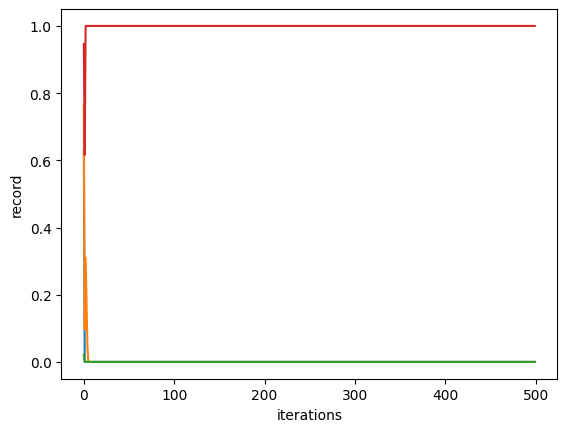

[0. 0. 0. 0.]
0.0


In [87]:
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection

record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
def model(input_values, record, activity, w, iterations):
    for i in range(iterations):
        # the new neuron value is the old value times the weight matrix (for the neurons 
        #  inhibiting and exciting each other), plus the input benig added.
        # we also clip the neurons so their activity doesn't go below 0 or above 1
        activity = np.clip(input_values + w @ activity, 0, 1)
        record.append(activity)

correct = 0
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
input = [0.7, 0.8, 0.4, 0.3]
iterations = [10, 20, 50, 100, 200, 500]
plt.figure()

for iteration in iterations:
    record = []                   # for recording the activity values
    activity = np.zeros(N)        # neurons are not active initially

    model(input_values, record, activity, w, iteration)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
        correct += 1
    plt.plot(record)
    plt.xlabel('iterations')
    plt.ylabel('record')
    plt.show()

print(activity)
print(correct/len(X))

**2. d) [2 marks]**  Try improving the model by adjusting the amount of inhibition (-0.9) and the amount of excitation (1).  Can you improve the proportion of time the model produces the correction output?  To simplify your experimentation, keep the number of timesteps as 20.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


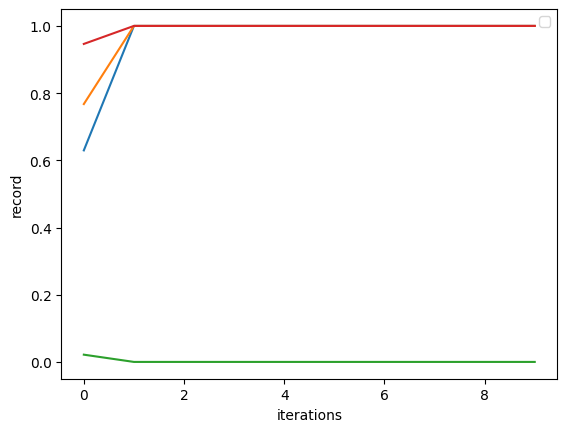

[0. 0. 0. 0.]
0.0


In [88]:
w = np.zeros((N,N))
w[:] = -0.1   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 2   # set the excitatory connection

record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
def model(input_values, record, activity, w):
    for i in range(10):
        # the new neuron value is the old value times the weight matrix (for the neurons 
        #  inhibiting and exciting each other), plus the input benig added.
        # we also clip the neurons so their activity doesn't go below 0 or above 1
        activity = np.clip(input_values + w @ activity, 0, 1)
        record.append(activity)

correct = 0
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
input = [0.7, 0.8, 0.4, 0.3]
plt.figure()

record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially

model(input_values, record, activity, w)
target[np.argmax(input_values)] = 1
if np.all(target == activity):
    correct += 1
plt.plot(record)


plt.legend()
plt.xlabel('iterations')
plt.ylabel('record')
plt.show()
print(activity)
print(correct/len(X))

# 3. Action Selection with Winner-Take-All and a Synapse

We are now going to add a biological detail to the Winner-Take-All system.  In biology, when there is a connection between neurons, there is a synapse, and the activity of that synapse decays slowly over time.  This means that when a spike occurs, the input into the next neuron will suddenly increase, and then slowly decrease.

Here we will make a simple approximation of this process.  We will be implementing this as a *low-pass filter*.  The only parameter is the one that controls how quickly the synaptic activity will decay, and we will call this `tau`.  To implement a low-pass filter as part of our neuron model, we can compute the synaptic activity as follows, where `dt` is how long one timestep is in our model:

```python
alpha = 1-np.exp(-dt/tau)

activity_syn = activity_syn + alpha * (activity - activity_syn)
```

Here is what that would look like for a single input that gave a single spike on the 5th timestep, where each timestep is 0.001 seconds and the synaptic time constant is 0.01 seconds (10 milliseconds):



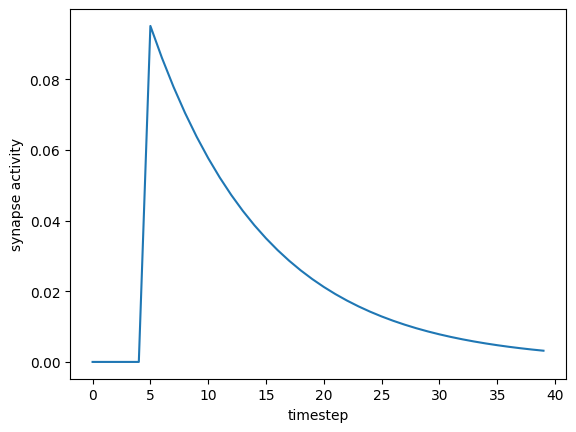

In [89]:
activity - np.zeros(1)
activity_syn = np.zeros(1)

dt = 0.001    # length of a timestep
tau = 0.010   # time constant for the synapse
alpha = 1-np.exp(-dt/tau)
record = []
for i in range(40):
    activity = 0
    if i == 5:
        activity = 1
    activity_syn = activity_syn + alpha * (activity - activity_syn)   
    record.append(activity_syn)

import matplotlib.pyplot as plt
plt.plot(record)
plt.xlabel('timestep')
plt.ylabel('synapse activity')
plt.show()

While our winner-take-all model is not spiking, we can still add this synapse model to the system.  This would be done as follows:

In [90]:
record = []             
activity = np.zeros(N)        # the raw output from the neuron
activity_syn = np.zeros(N)    # the output from the synapse
for i in range(20):
    activity = np.clip(input_values + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
    activity_syn += alpha * (activity - activity_syn)          # implement the synapse 

    record.append(activity_syn)    


**3. a) [1 mark]** Test the winner-take-all model with a synapse time constant of 10 milliseconds, inhibition of -0.9, and excitation of 1 against all the data in `X`, running it for 20 timesteps (with each timestep being 1 millisecond).  What proportion of time does it get the correct answer?  Repeat this for differet synapse time constants (try 0.001, 0.002, 0.005, 0.01, and 0.02 seconds) and generate a plot showing the accuracy as you change the time constant.


**3. b) [2 marks]** Try improving the model by adjusting the synaptic time constant, the amount of inhibition and the amount of excitation.  Can you improve the proportion of time the model produces the correct output?  To simplify your experimentation, keep the number of timesteps as 20.  As a hint, you should be able to get the model close to 99% accuracy!  This is an example of adding a biological detail to a model and having it improve its performance.
